In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
import collections
import matplotlib
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# starting the EDA


**Reading the CSV FILE**

In [2]:
df =  pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')


**looking out on data for analysis**

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


We can see there is null values present on above data,so we have to deal with these NaN values

# Dealing with NaN values

Checking out the count of NaN values in each column

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

The director column has a largest sum of NaN values,and least for rating Column,let's visulaize it through Heat Map

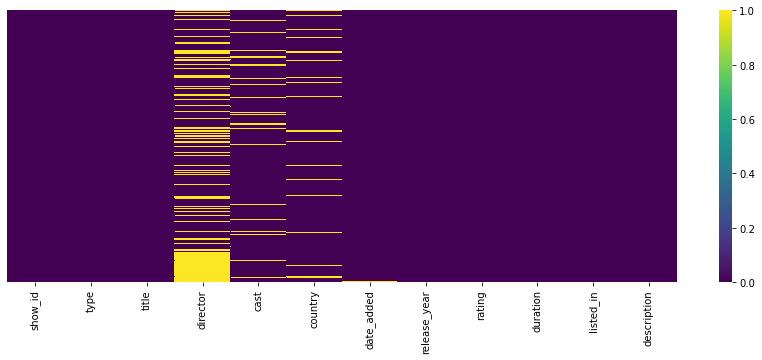

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

now I am going to drop the cast ,date added column because these don't contribute in my EDA,also droping the director column since this have a large no. of NaN values,and there is no way to deal with them except the hardcoding way by searching it on google i guess

In [7]:
df.drop(['date_added','director','cast'],axis = 1,inplace = True)

Country has some signifiance in my EDA,so let's look what we can do

checking out the count for the country

In [8]:
df['country'].value_counts()

United States                               2032
India                                        777
United Kingdom                               348
Japan                                        176
Canada                                       141
                                            ... 
Uruguay, Argentina, Spain                      1
Colombia, United States                        1
United States, India, South Korea, China       1
Uruguay, Spain, Mexico                         1
Hong Kong, Taiwan                              1
Name: country, Length: 554, dtype: int64

since almost every Netflix shows is being realsed in USA, so i thing it's a best way to replace NaN values by USA

In [9]:
df['country'].replace(np.nan,'United States',inplace = True)

checking whether we have Deal with the Null values or not

In [10]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

seems like the rating has also have a 10 NaN values,so i am using the same way which i have used for the country column

In [11]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [12]:
df['rating'].replace(np.nan,'TV-MA',inplace = True)

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

so Finally we got zero nan values,after wroking on it


In [14]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Now the data looks clean ,let's start visualizing the data

# visualization


let's start with checking which year has the max no. of Release

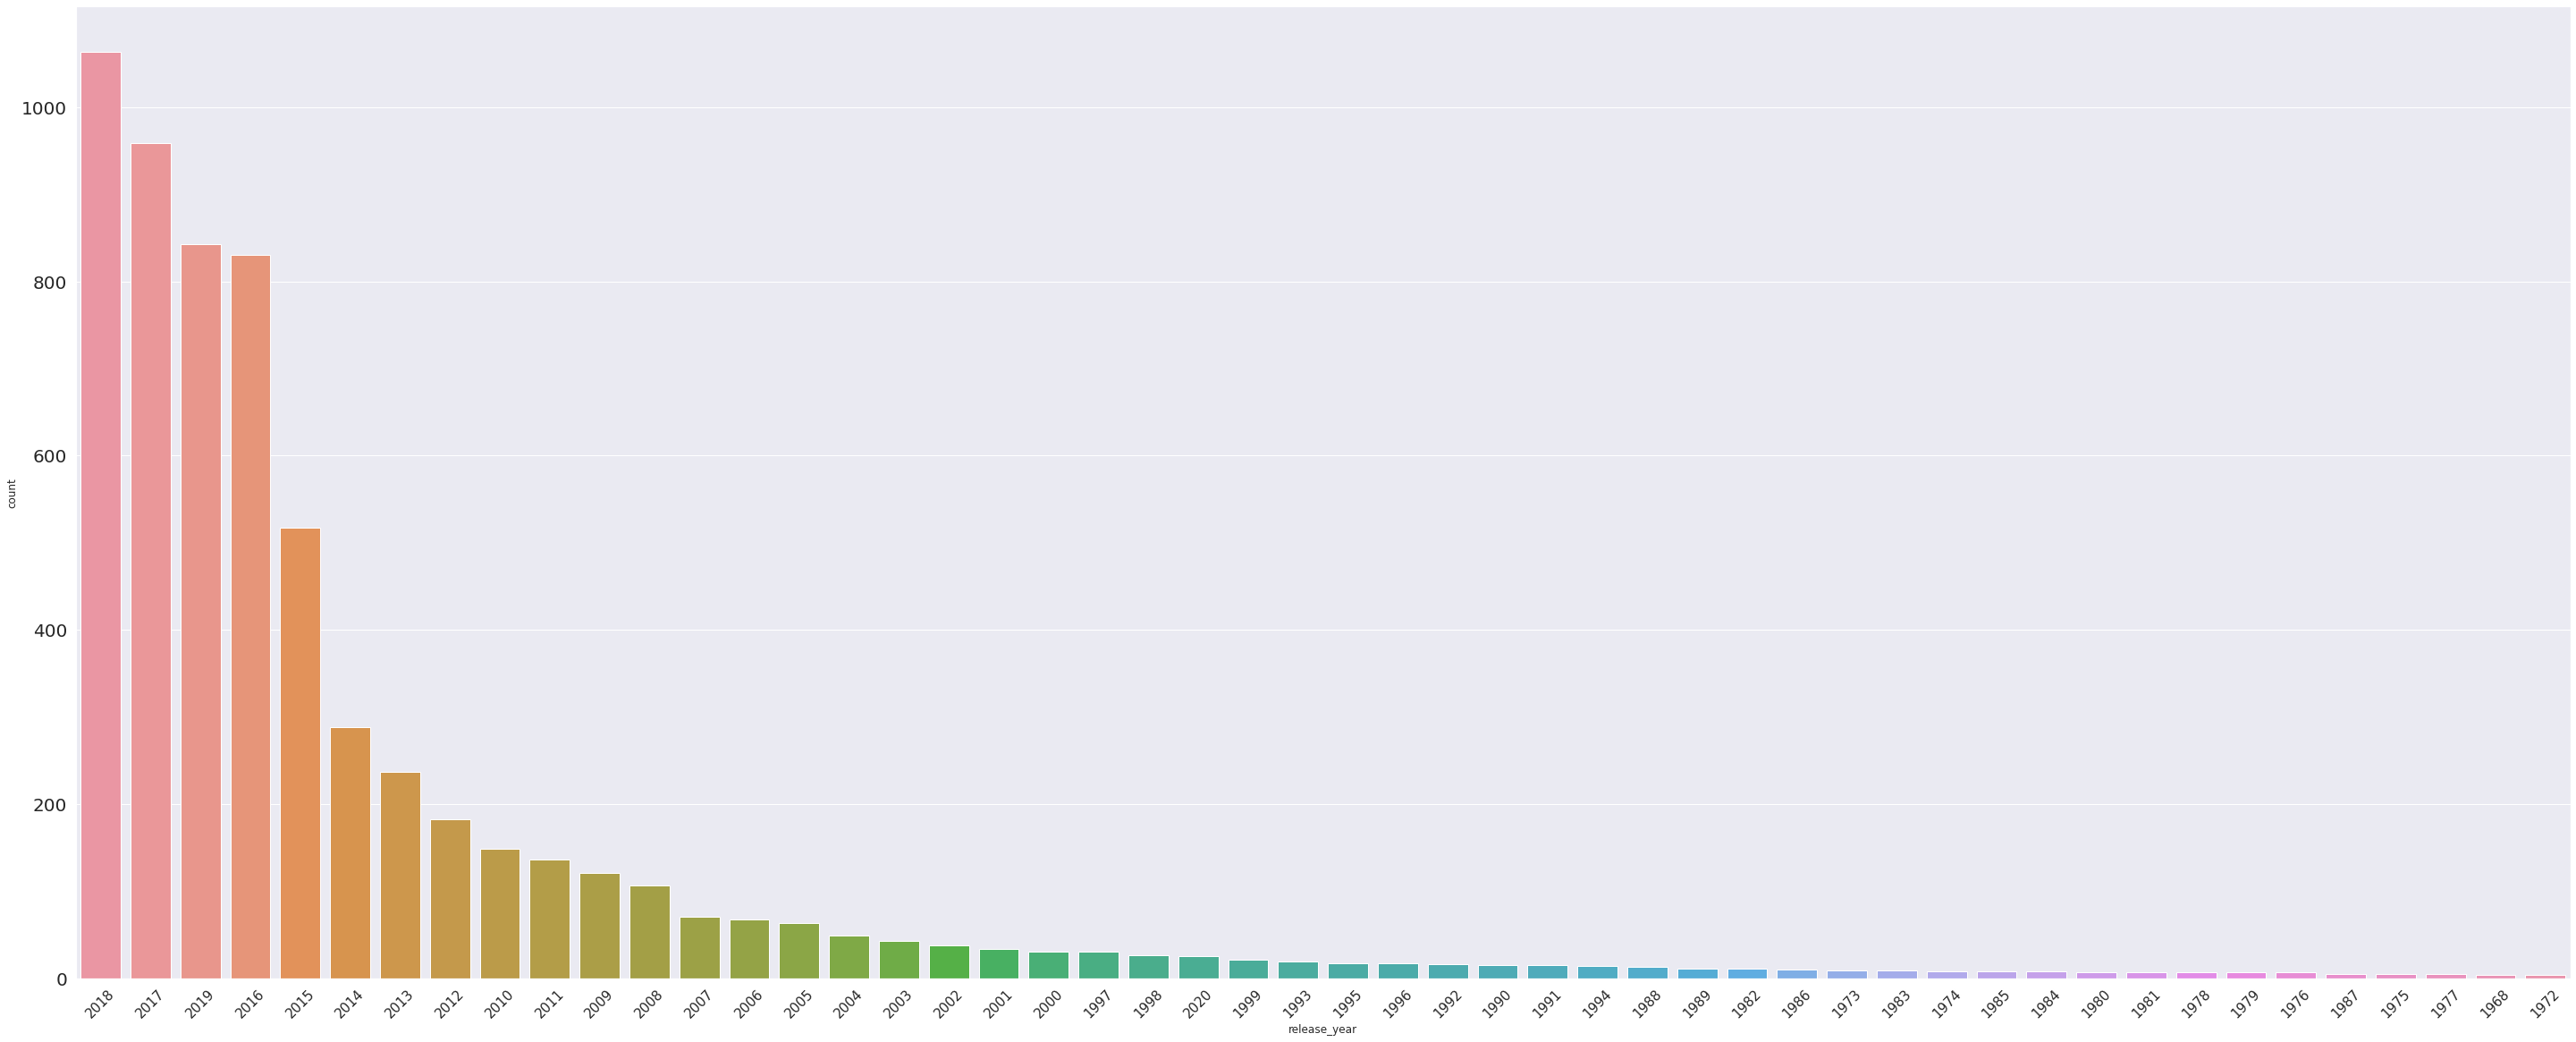

In [15]:
sns.set()
plt.figure(figsize=(50,20))
sns.countplot(df['release_year'],order = df['release_year'].value_counts().index[0:50])
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 20)
plt.show()

clearly we can see that the 2018 year has mos no. of Releases,follwed by 2017,2019.

now let's have a look of the country netflix targets the most

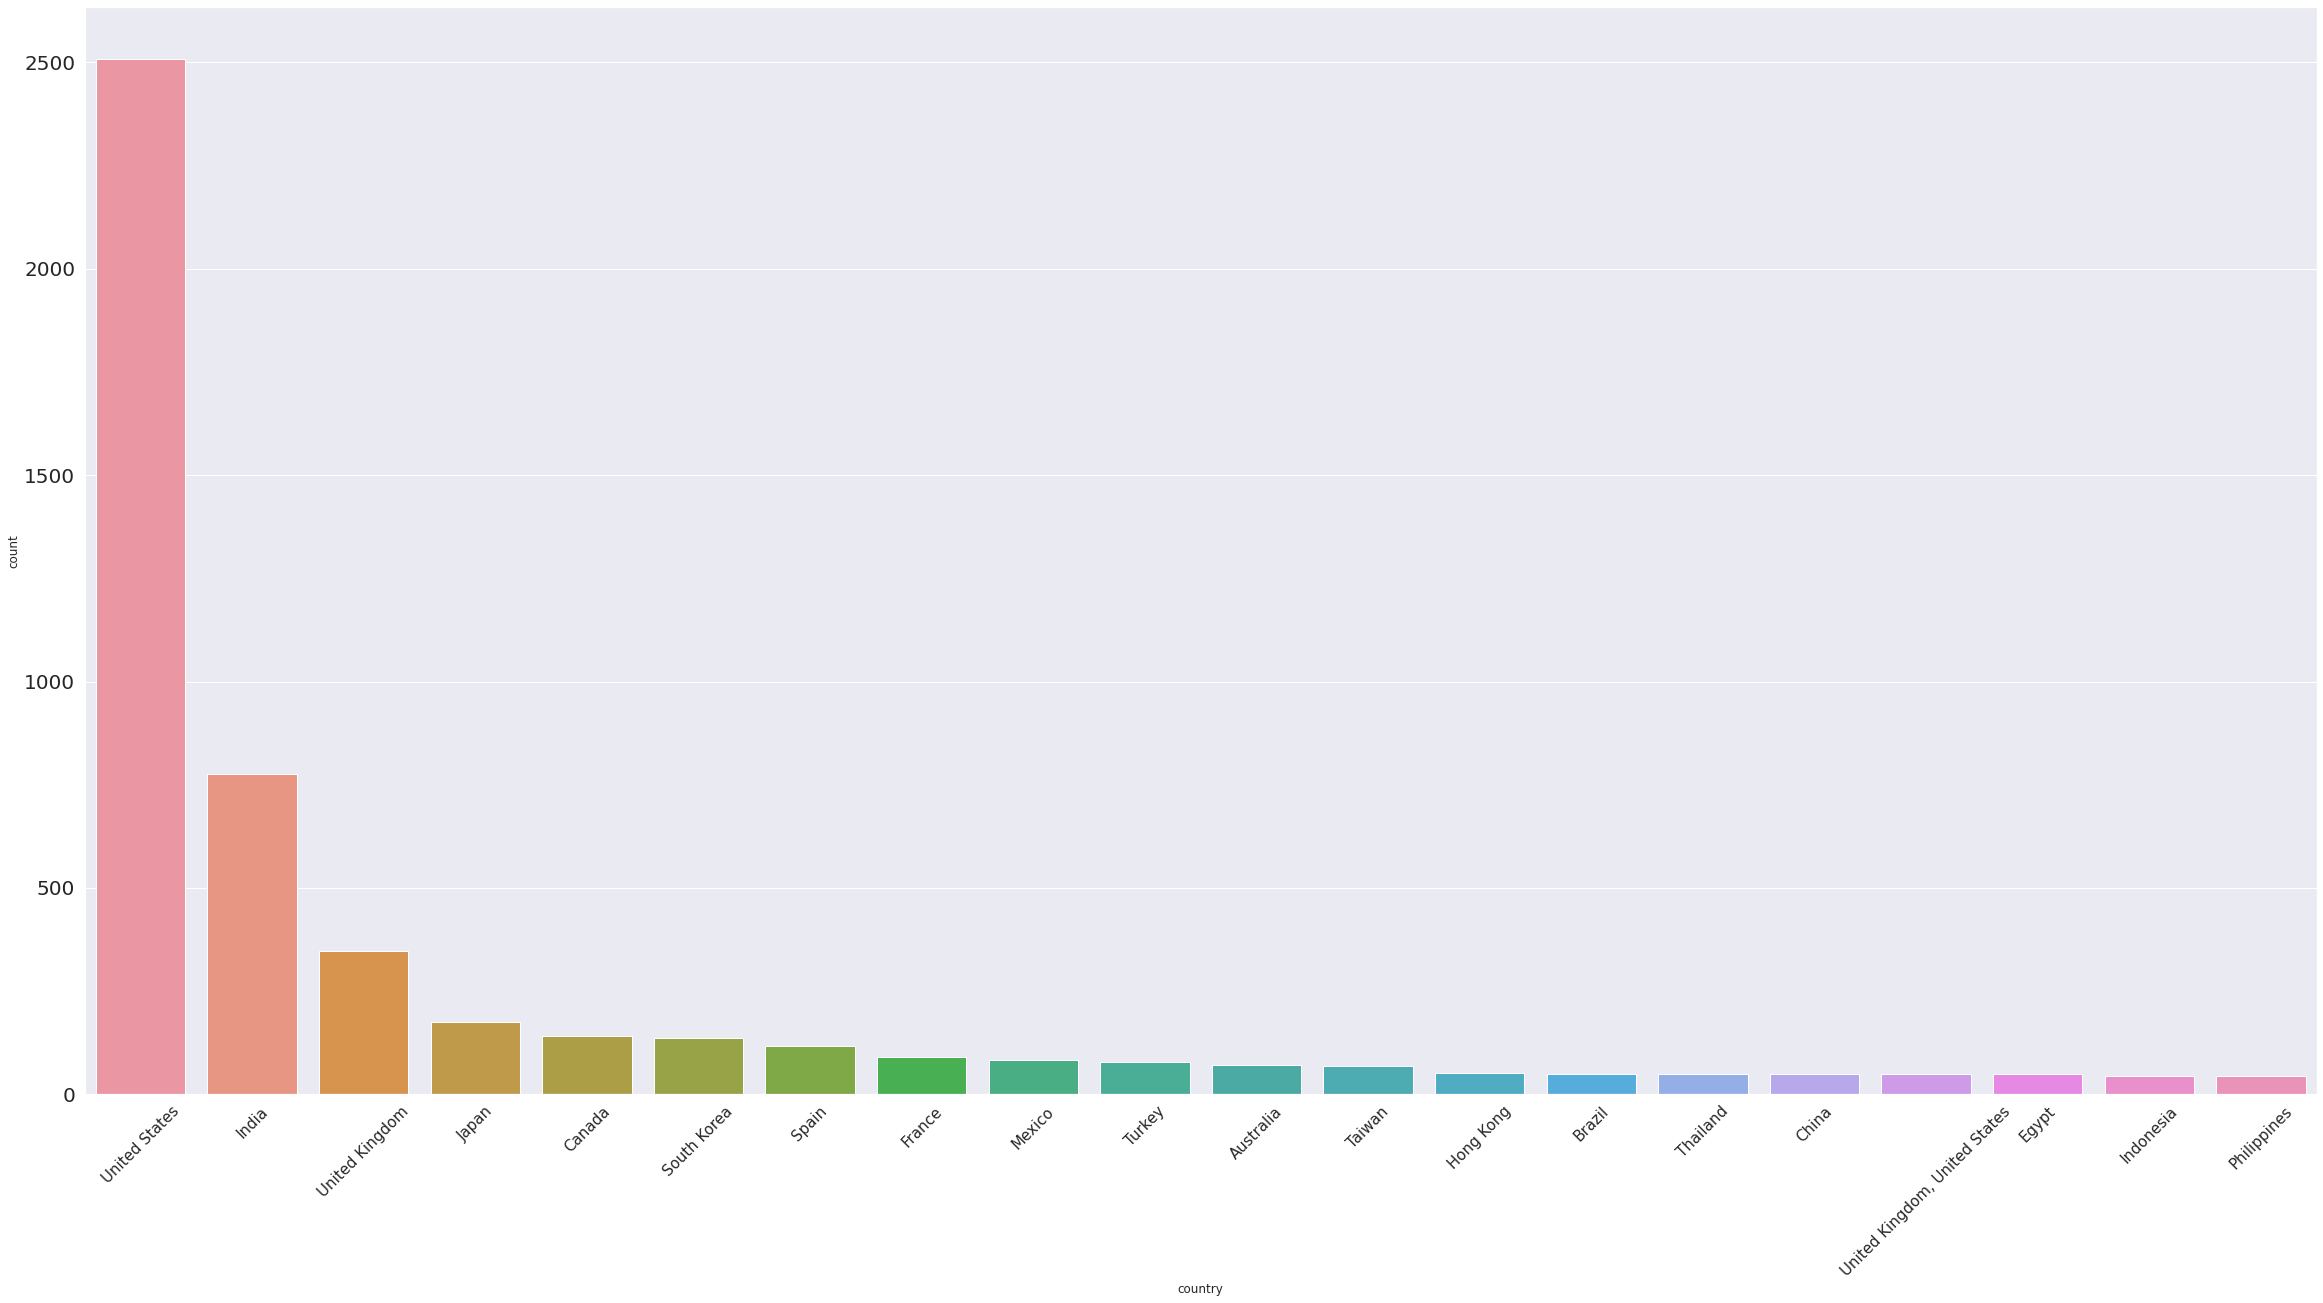

In [16]:
sns.set()
plt.figure(figsize=(40,20))
sns.countplot(df['country'],order = df['country'].value_counts().index[0:20])
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 20)
plt.show()

so clearly visible netflix has realses it most of the shows in USA follwed by INDIA & UK,can i say that these are the countries producing the 60-70% revenue for netflix,the answer will be BIG YES.

Let's check the genres tag for movies

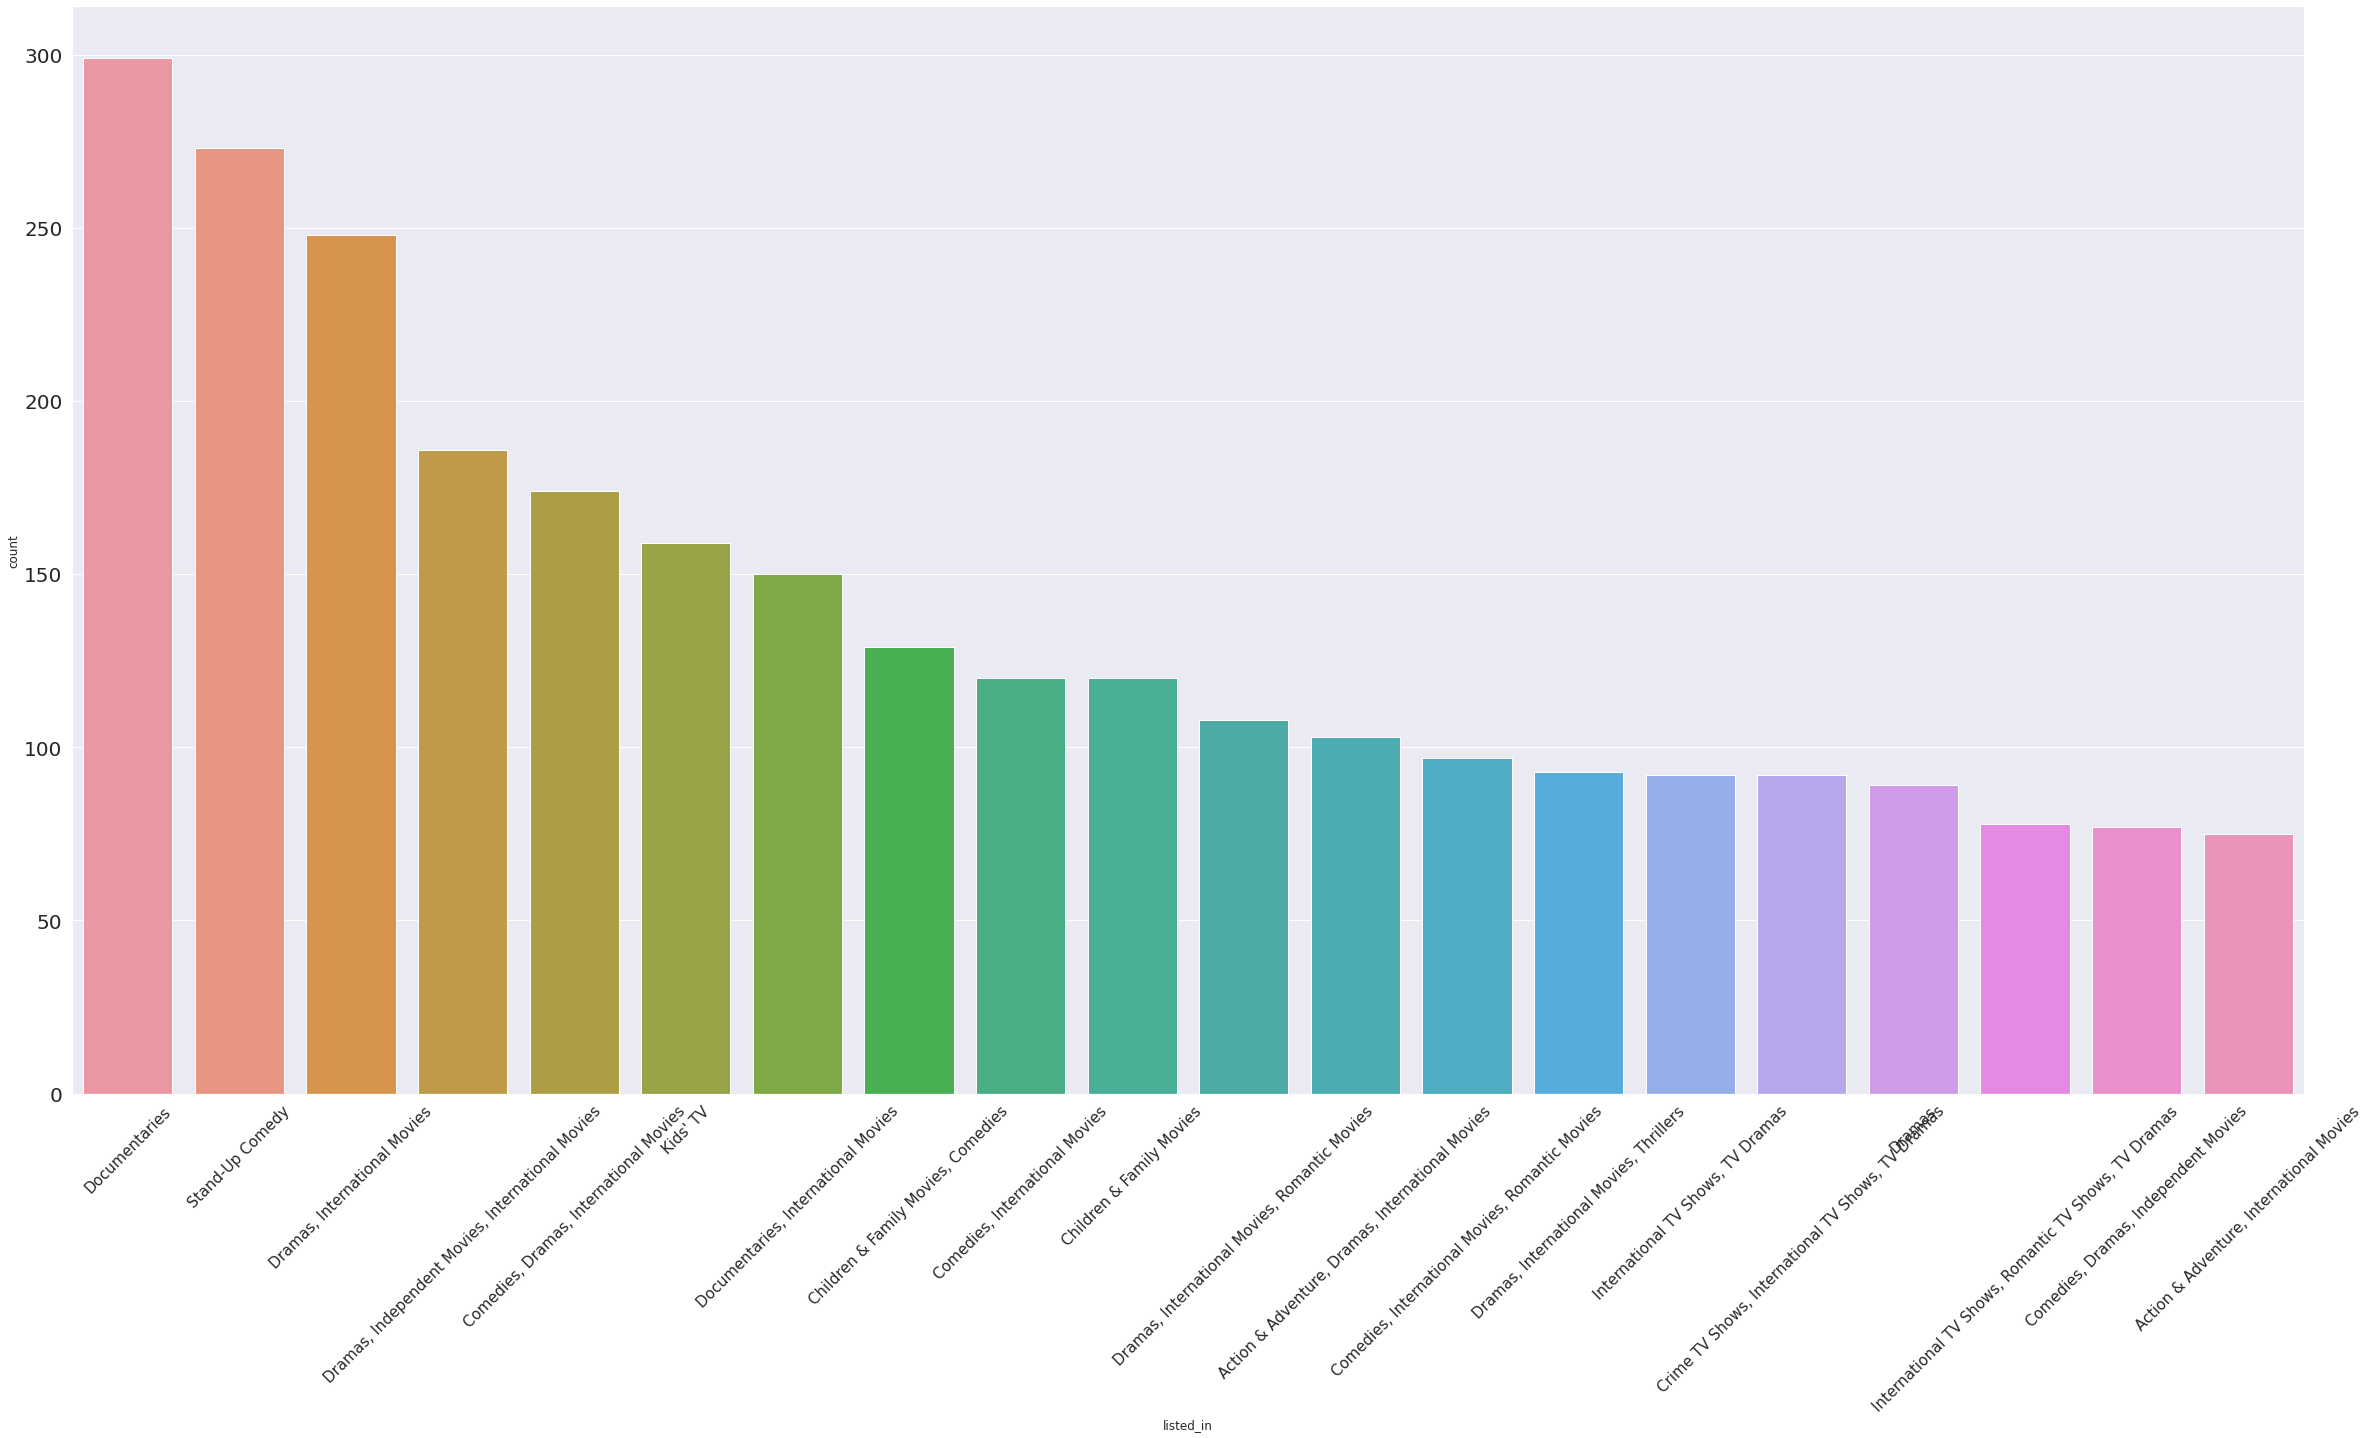

In [17]:
sns.set()
plt.figure(figsize=(40,20))
sns.countplot(df['listed_in'],order = df['listed_in'].value_counts().index[0:20])
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 20)
plt.show()

Netflix made what users loves the most,so they target a thing which users like, for eg. Documentaries,Satnd-up comedies,Dramas,which is clearly visible from the above fig.

let's check whether what they prefer TV_SHOWS OR MOVIES.

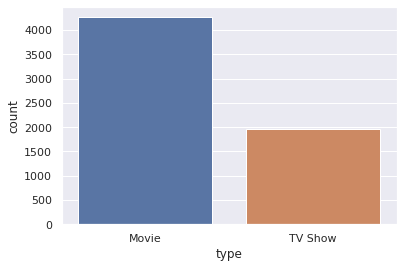

In [18]:
sns.countplot(df['type'])


Movies are more in number,as a student i also loves to watch movies,because they are just of 3 hours. so here we talks out duration so why not check the duration column of the datasets,

> *the more you play with data,the more insight you get,so ofcourse you can generate the more things.*

In [19]:
df['duration']

0           90 min
1           94 min
2         1 Season
3         1 Season
4           99 min
           ...    
6229    13 Seasons
6230     4 Seasons
6231        60 min
6232     2 Seasons
6233    10 Seasons
Name: duration, Length: 6234, dtype: object

In [20]:
data = df[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)
df2 = df[~data]
df2.index = np.arange(len(df2))
list1 =[]
for i in df2.duration:
    if i[2]=='m':
        list1.append(int(i[:2]))
    else:
        list1.append(int(i[:3]))
df2['duration_time'] = list1  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Duration Distribution')

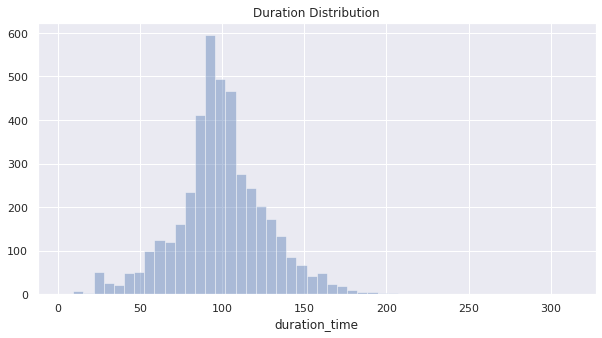

In [21]:
plt.figure(figsize =(10,5))
sns.distplot(df2.duration_time,kde =False)
plt.title('Duration Distribution')

as you can see max movies and shows has around 90 min. duration,so have short movies more fun.

**lets look out on top genres also.**

In [22]:
top_genres=df["listed_in"].value_counts()[0:15]
top_genres.head()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

few more things,lets look on them also

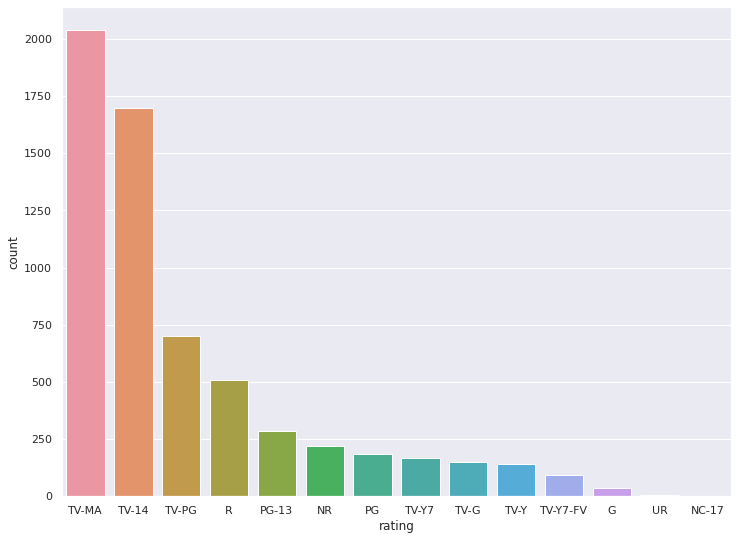

In [23]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=df,order= df['rating'].value_counts().index[0:14])

**Here goes TV-Rating Vs. the type of show**

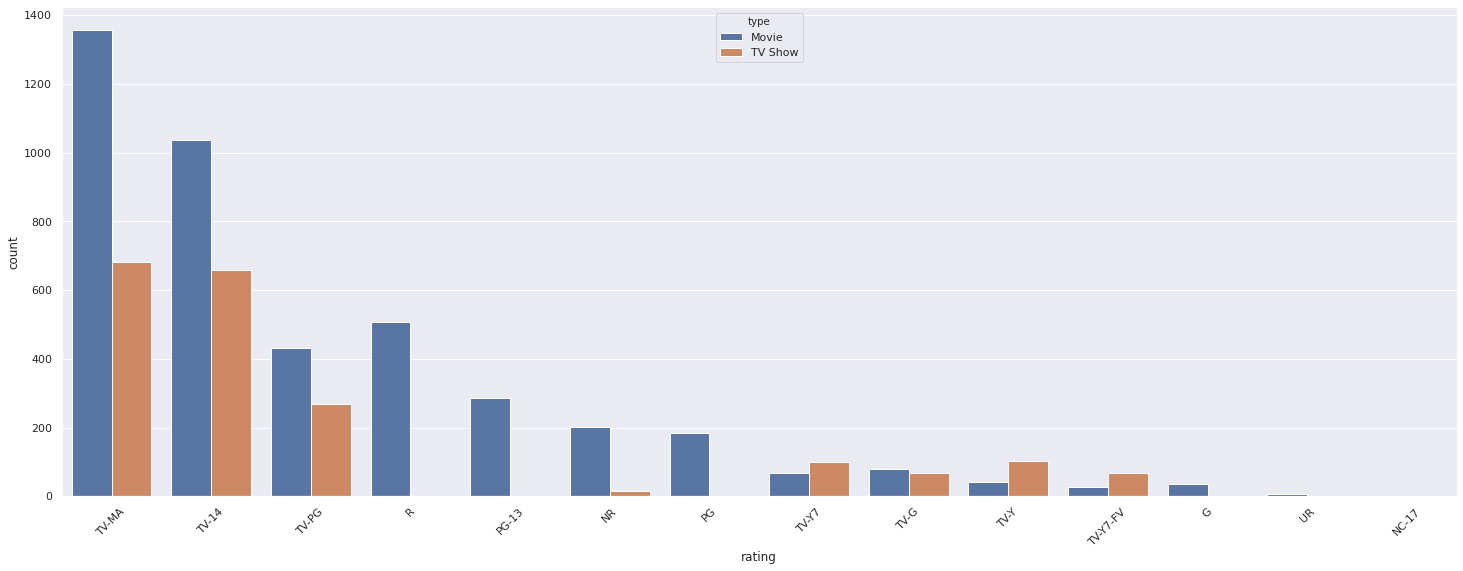

In [24]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= df,hue= "type",order = df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

let's have a look on wordcloud aslo.

In [25]:
from wordcloud import WordCloud

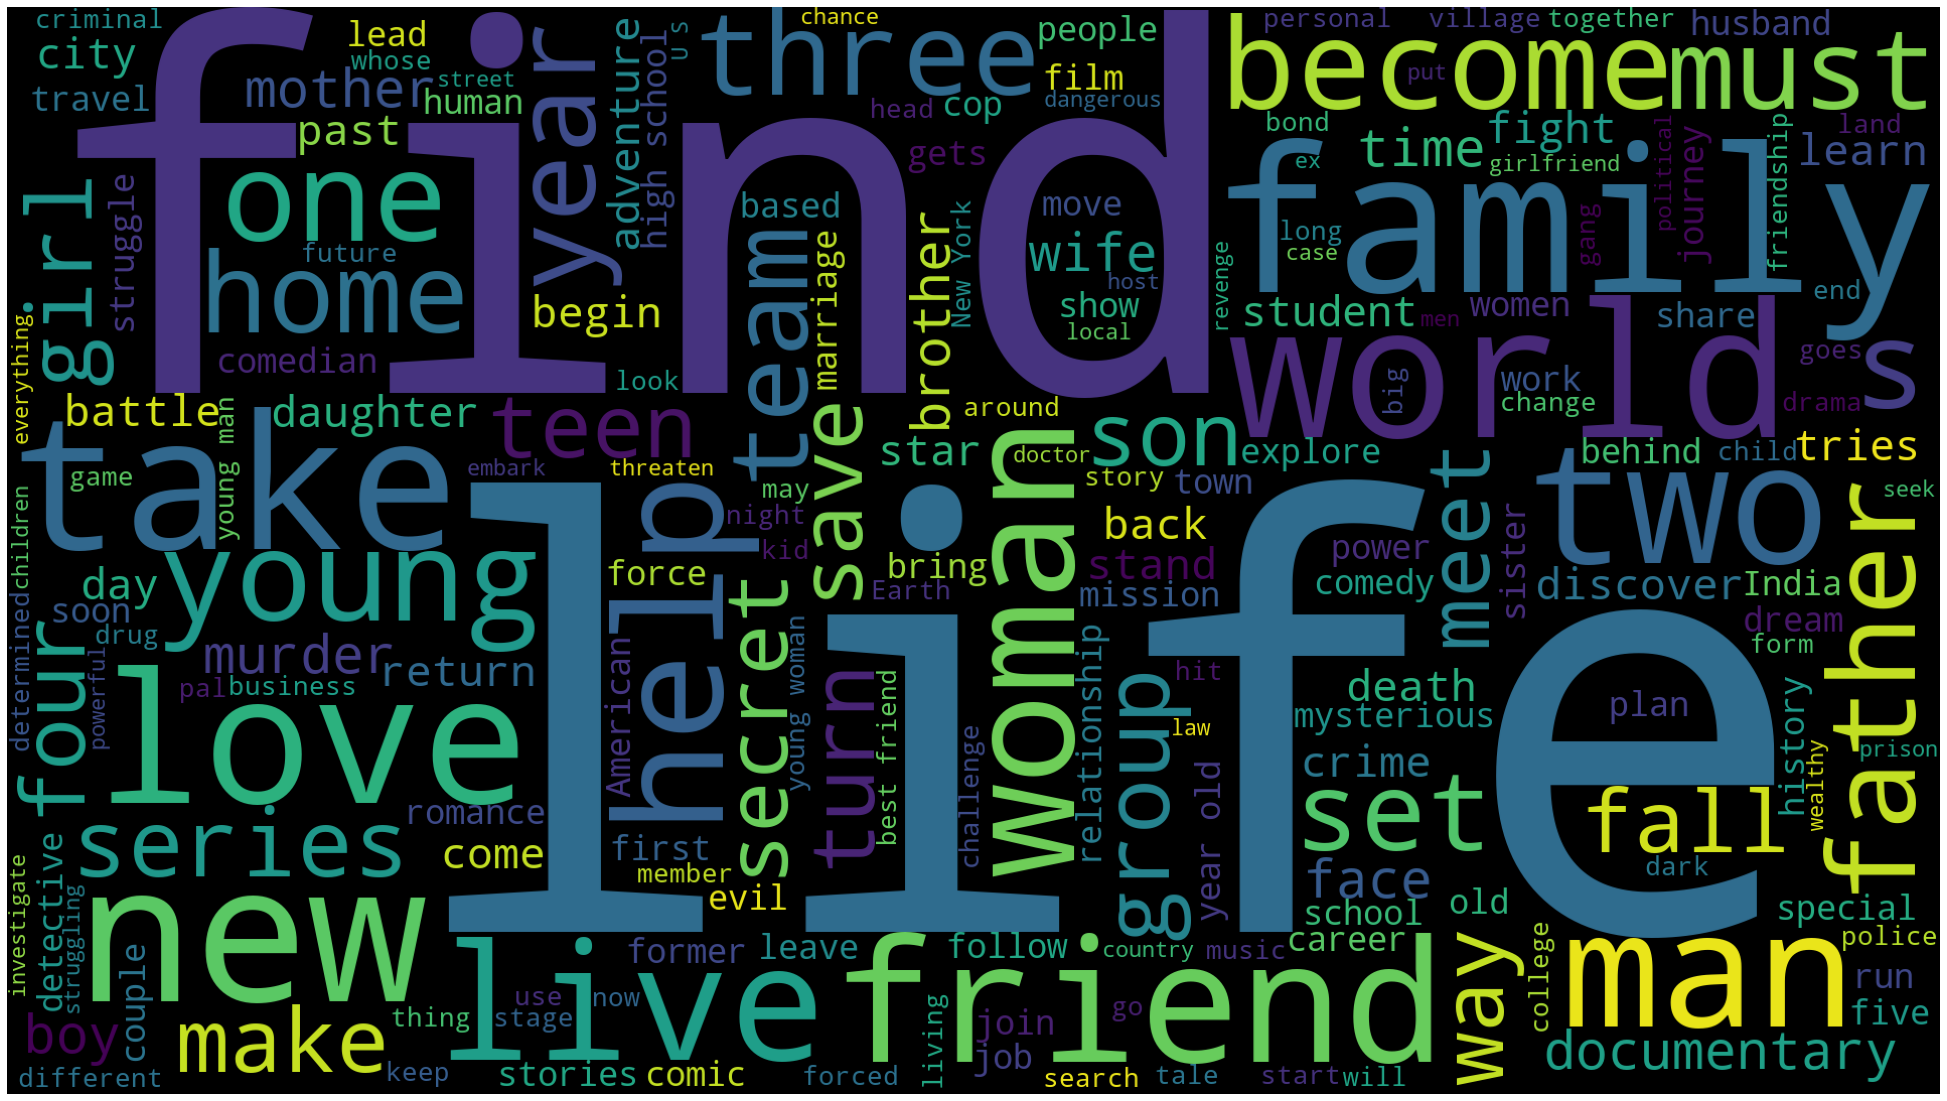

In [26]:

plt.figure(figsize=(40,20))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

**FINALLY I AM CONCLUDING MY NOTEBOOK,I HAVE LEARNT MANY THINGS FROM OTHER NOTEBOOKS ALSO,DO UPVOTE IF YOU GET SOME INSIGHTS FROM MY NOTEBOOK.**